# TOC

__Lab 02 - cross-validation, parameter tuning and pipelines__
1. [Import](#Import)
1. [Basic model - KNearestNeighbors](#Basic-model-KNearestNeighbors)
    1. [Example 1 - basic model](#Basic-model-KNearestNeighbors-Example1)
1. [Model evaluation - cross-validation](#Model-evaluation-cross-validation)
    1. [Example 1 - CV w/ KNearestNeighbors](#Model-evaluation-cross-validation-Example1)
    1. [Example 2 - CV w/ logistic regression](#Model-evaluation-cross-validation-Example2)
1. [Parameter tuning](#Parameter-tuning)
    1. [Example 1 - inefficient search for 'k'](#Parameter-tuning-Example1)
    2. [Example 2 - GridSearchCV w/ 1 parameter](#Parameter-tuning-Example2)
    3. [Example 3 - GridSearchCV w/ multiple parameters](#Parameter-tuning-Example3)
1. [Pipelines](#Pipelines)
    1. [Example 1 - pipeline model](#Pipelines-Example1)
1. [Parameter tuning w/ pipelines](#Parameter-tuning-w/-pipelines)
    1. [Example 1 - pipeline model w/ parameter tuning, KNearestNeighbors](#Parameter-tuning-w/-pipelines-Example1)
    1. [Example 2 - pipeline model w/ parameter tuning, KNearestRegressor](#Parameter-tuning-w/-pipelines-Example2)

# Import

<a id = 'Import'></a>

In [1]:
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:78% !important; }</style>"))

from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    train_test_split,
    GridSearchCV,
)

# Basic model - KNearestNeighbors   

KNearestNeighbors is an algorithm that predicts the class of an observation based on the labels of the 'K' nearest observations. This is a non-parametric algforithm in that there are no coefficient to be learned based on the data. A major drawback to the algorithm is that the entire training set is needed to make a prediction, making this a relatively slow algorithm to execute.

<a id = 'Basic-model-KNearestNeighbors'></a>

## Example 1 - basic model

Using Iris dataset:
- Split data into train/test set.
- Build a KNN model on training data.
- Evaluate model using accuracy score metric on test set.

<a id = 'Basic-model-KNearestNeighbors-Example1'></a>

In [2]:
# load and inspect data
iris = load_iris()
X = iris.data
y = iris.target

print("X dimensions: {0}".format(X.shape))
print("y dimensions: {0}".format(y.shape))

X dimensions: (150, 4)
y dimensions: (150,)


In [3]:
# review observations
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
# review feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# review labels
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
# review category labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# train/test set split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=4)

In [8]:
# train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
# test set predictions
yPred = knn.predict(xTest)
print("Accuracy: {0}".format(round(accuracy_score(yTest, yPred), 3)))

Accuracy: 0.974


# Model evaluation - cross-validation

Cross-validation is a method for repeatedly training a model on several different slices of training and test data. KFold cross-validation fits a model 'K' times. The test set is $1/K$ of the total dataset, and the remaining data is used for training the model. Each subsequent fold involves reincorporating the test set back into the original dataset and selecting a new slice as the test set for the next iteration.

Cross-validation gives insight into how the quality model of a model changes as the training and test dat changes. Ideally, the average accuracy is high with a small standard deviation. A downside is the thoroughness of the approach given that  the model needs to be trained K times.

<a id = 'Model-evaluation-cross-validation'></a>

## Example 1 - CV w/ KNearestNeighbors 

Using Iris dataset:
- Use cross_val_score to perform 10-fold cross-validation on full dataset using KNN.
- Use accuracy metric to evaluate each fold.
- Review and visualize mean of each fold.

<a id = 'Model-evaluation-cross-validation-Example1'></a>

In [10]:
# load data
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
# use cross_val_score to retrieve 10 different scores with model
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [12]:
# evaluate cross-validation
print("Mean of cross validation scores, KNN: {0}".format(round(scores.mean(), 3)))
print("Spread of cross validation scores, KNN: {0}".format(round(scores.std(), 3)))

Mean of cross validation scores, KNN: 0.967
Spread of cross validation scores, KNN: 0.045


## Example 2 - CV w/ logistic regression

Using Iris dataset:
- Repeat the above example using logistic regression.

<a id = 'Model-evaluation-cross-validation-Example2'></a>

In [13]:
# load data
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
# use cross_val_score to retrieve 10 different scores with model
logReg = LogisticRegression()
scores = cross_val_score(logReg, X, y, cv=10, scoring="accuracy")
print(scores)

[1.         1.         1.         0.93333333 0.93333333 0.93333333
 0.8        0.93333333 1.         1.        ]


In [15]:
# evaluate cross-validation
print(
    "Mean of cross validation scores, Logistic Regression: {0}".format(
        round(scores.mean(), 3)
    )
)
print(
    "Spread of cross validation scores, Logistic Regression: {0}".format(
        round(scores.std(), 3)
    )
)

Mean of cross validation scores, Logistic Regression: 0.953
Spread of cross validation scores, Logistic Regression: 0.06


> Remarks - According to the CV results, the KNN model has a higher average score and a smaller spread of scores, making this the better model of the two.

# Parameter tuning

Parameter tuning is the practice of choosing the optimal parameters for a model given a data set. For example, KNN has a weight parameter that can be used to implement uniform weighting or distance weighting. The latter values closer neighbors higher than those further away, whereas the former evaluates all neighbors equally. As another example, LASSO linear regression has an alpha parameter that can take on any numerical value and determines how rapidly or slowly feature weights are dimished to zero.

Grid search is a method for evaluating several different values for a parameter. This can be extended to simultaneously evaluate several different values for several different parameters. The number of times that grid search fits a model is equal to the number of unique combinations of parameters. GridSearchCV also allows for the incorporation of cross validation into the grid search. This obviously multiplies the total number of model fits, but is certainly thorough.

<a id = 'Parameter-tuning'></a>

## Example 1 - inefficient search for 'k'

Using Iris dataset:
- Perform inefficient search of K values 1-30 using 10-fold cross-validation.
- Use accuracy metric to evaluate each fold.
- Review mean of each fold.

<a id = 'Parameter-tuning-Example1'></a>

In [16]:
# load data
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
# inefficient k-value search for illustrative purposes
kRange = list(range(1, 31))
kScores = []
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    kScores.append(round(scores.mean(), 3))
print(kScores)

[0.96, 0.953, 0.967, 0.967, 0.967, 0.967, 0.967, 0.967, 0.973, 0.967, 0.967, 0.973, 0.98, 0.973, 0.973, 0.973, 0.973, 0.98, 0.973, 0.98, 0.967, 0.967, 0.973, 0.96, 0.967, 0.96, 0.967, 0.953, 0.953, 0.953]


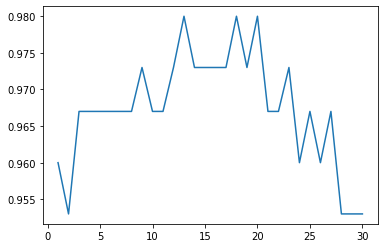

In [18]:
# visualize average 10-fold CV score for each value of k from 1 to 30
plt.plot(kRange, kScores)

In [19]:
# review best value of k
print("Best value of k: {}".format(kRange[np.argmax(kScores)]))

Best value of k: 13


> Remarks - According to the 10-fold CV results, the best value of k is 13.

## Example 2 - GridSearchCV w/ 1 parameter

Using Iris dataset:
- Tune parameters for KNN model by performing efficient search of K values 1-30 using GridSearchCV, which also incorporates KFold cross-validation.
- Review and visualize the mean and standard deviation of each fold.
- Review best score, best parameters and best model.

<a id = 'Parameter-tuning-Example2'></a>

In [20]:
# load data

iris = load_iris()
X = iris.data
y = iris.target

In [21]:
# build parameter grid

kRange = np.arange(1, 31)
paramGrid = dict(n_neighbors=kRange)
print(paramGrid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}


In [22]:
# run GridSearcCV
knn = KNeighborsClassifier()
gridSearch = GridSearchCV(knn, paramGrid, cv=10, scoring="accuracy")
gridSearch.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
gridSearch.cv_results_

{'mean_fit_time': array([0.00046325, 0.0003684 , 0.00051961, 0.0003396 , 0.00036361,
        0.00033898, 0.00034301, 0.00032101, 0.00031803, 0.0002914 ,
        0.00050614, 0.00049293, 0.00046461, 0.00035863, 0.00035691,
        0.00035048, 0.00032248, 0.00038431, 0.00043378, 0.00037293,
        0.00053363, 0.0003387 , 0.00035877, 0.00043499, 0.00036049,
        0.00035915, 0.00030789, 0.00033724, 0.00051389, 0.00033748]),
 'std_fit_time': array([0.00016971, 0.00010787, 0.00043801, 0.00004691, 0.00008926,
        0.00004543, 0.00003818, 0.00005106, 0.00004919, 0.00002081,
        0.00031322, 0.00046635, 0.00037254, 0.00010048, 0.00010981,
        0.00009972, 0.00004363, 0.00021366, 0.00037176, 0.00014642,
        0.00021676, 0.00008249, 0.00008175, 0.00040917, 0.00017792,
        0.00008541, 0.00003521, 0.00006315, 0.00063418, 0.00007663]),
 'mean_score_time': array([0.00189307, 0.00135069, 0.00102973, 0.00099275, 0.00104594,
        0.00104618, 0.00122371, 0.00107934, 0.00091991, 0.00

In [24]:
gridSearch.cv_results_["std_test_score"]

array([0.05333333, 0.05206833, 0.04472136, 0.04472136, 0.04472136,
       0.04472136, 0.04472136, 0.04472136, 0.03265986, 0.04472136,
       0.04472136, 0.03265986, 0.0305505 , 0.04422166, 0.03265986,
       0.03265986, 0.03265986, 0.0305505 , 0.03265986, 0.0305505 ,
       0.03333333, 0.03333333, 0.03265986, 0.04422166, 0.03333333,
       0.04422166, 0.04472136, 0.04268749, 0.04268749, 0.04268749])

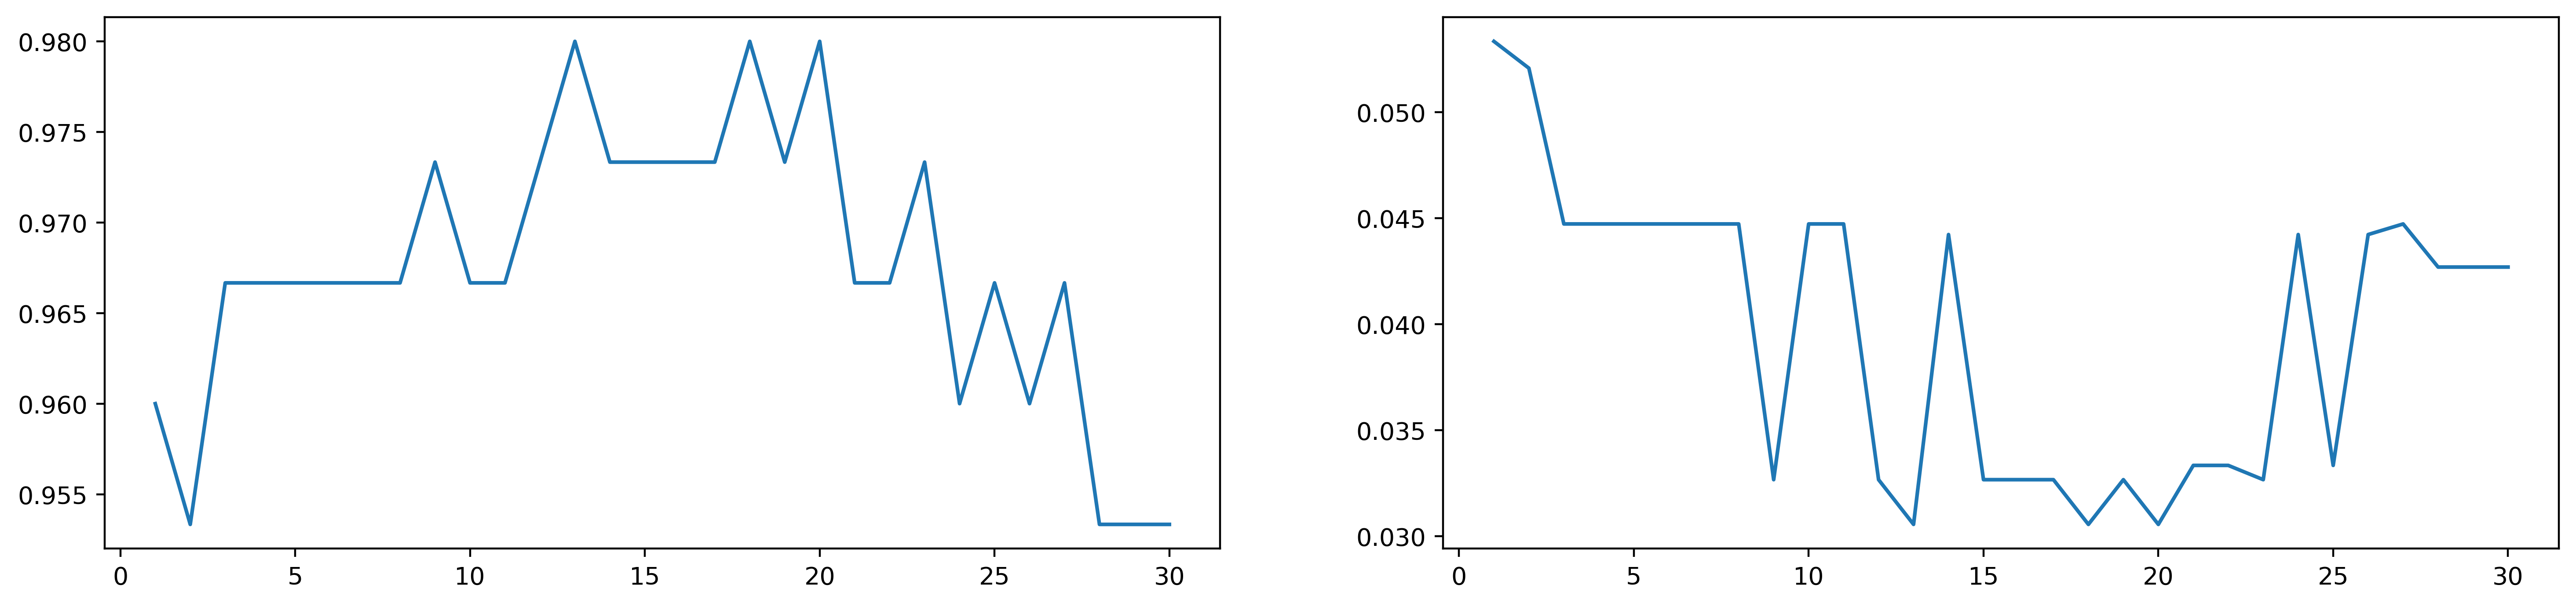

In [25]:
# visualize and evaluate GridSearchCV results
allMeans = gridSearch.cv_results_["mean_test_score"]
allStds = gridSearch.cv_results_["std_test_score"]

fig = plt.figure(figsize=(18, 4), dpi=400)
alpha_level = 0.65

ax1 = fig.add_subplot(121)
ax1.plot(kRange, allMeans)

ax2 = fig.add_subplot(122)
ax2.plot(kRange, allStds)

In [26]:
# review optimum k-values based on mean and standard deviation
print("Value of k with highest average score: {}".format(kRange[np.argmax(allMeans)]))
print("Value of k with lowest average spread: {}".format(kRange[np.argmin(allStds)]))

Value of k with highest average score: 13
Value of k with lowest average spread: 13


> Remarks - k = 13 has the highest average score and the lowest average spread.

In [27]:
# review best model
print("Best score: {0}".format(gridSearch.best_score_))
print("Best parameter: {0}".format(gridSearch.best_params_))
print("Best estimator: {0}".format(gridSearch.best_estimator_))

Best score: 0.98
Best parameter: {'n_neighbors': 13}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Example 3 - GridSearchCV w/ multiple parameters

Using Iris dataset:
- Tune parameters for KNN model by performing efficient search of K values 1-30 and weighting methods using GridSearchCV, which also incorporates KFold cross-validation.
- Review best score, best parameters and best model.

<a id = 'Parameter-tuning-Example3'></a>


In [28]:
# load data
iris = load_iris()
X = iris.data
y = iris.target

In [29]:
# build parameter grid
kRange = np.arange(1, 31)
weightMethods = ["uniform", "distance"]
paramGrid = dict(n_neighbors=kRange, weights=weightMethods)
print(paramGrid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['uniform', 'distance']}


In [30]:
# run GridSearcCV
gridSearch = GridSearchCV(knn, paramGrid, cv=10, scoring="accuracy")
gridSearch.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [31]:
# evaluate GridSearchCV
print("Best score: {0}".format(gridSearch.best_score_))
print("Best parameters: {0}".format(gridSearch.best_params_))
print("Best estimator: {0}".format(gridSearch.best_estimator_))

Best score: 0.98
Best parameters: {'n_neighbors': 13, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


# Pipelines

Pipelines are an efficient way to perform several different manipulations of the data in one step. If the goal is to scale the data, perform feature selection, and then finally train a model, a pipeline can combine these steps into one fit or fit/transform step rather than executing each step separately. Only one training algorithm can be used in the pipeline.

<a id = 'Pipelines'></a>


## Example 1 - pipeline model

Using Pima indians diabetes dataset:
- Build pipeline that performs standard scaling on data and then trains a linear discrimant analysis model.
- Pass the pipeline into cross_val_score to perform cross-validation.

<a id = 'Pipelines-Example1'></a>

In [32]:
# load data
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
df = pd.read_csv("s3://tdp-ml-datasets/misc/diabetes.csv", header=1, names=names)
array = df.values
X = array[:, 0:8]
y = array[:, 8]

print("X dimensions: {0}".format(X.shape))
print("y dimensions: {0}".format(y.shape))

X dimensions: (767, 8)
y dimensions: (767,)


In [33]:
# inspect observations

X[:5]

array([[  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ],
       [  1.   ,  89.   ,  66.   ,  23.   ,  94.   ,  28.1  ,   0.167,
         21.   ],
       [  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
         33.   ],
       [  5.   , 116.   ,  74.   ,   0.   ,   0.   ,  25.6  ,   0.201,
         30.   ]])

In [34]:
# inspect labels
y[:5]

array([0., 1., 0., 1., 0.])

In [35]:
# pipeline - use StandardScaler() to standardize data, use LDA to build model
pipeline = Pipeline(
    [("stdScaler", StandardScaler()), ("lda", LinearDiscriminantAnalysis())]
)
pipeline

Pipeline(memory=None,
         steps=[('stdScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lda',
                 LinearDiscriminantAnalysis(n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

In [36]:
# cross-validation using pipeline
scores = cross_val_score(pipeline, X, y, cv=10)
print("Mean of cross validation scores: {0}".format(round(scores.mean(), 3)))
print("Spread of cross validation scores: {0}".format(round(scores.std(), 3)))

Mean of cross validation scores: 0.776
Spread of cross validation scores: 0.034


# Parameter tuning w/ pipelines

Pipelines can be fed into GridSearCV along with a parameter grid, providing a tidy workflow that transforms data, evaluates several different parameters and values, and repeatedly trains a model to test stability.

<a id = 'Parameter-tuning-w/-pipelines'></a>

## Example 1 - pipeline model w/ parameter tuning, KNearestNeighbors

Using Pima indians diabetes dataset:
- Build pipeline that performs stand scaling on data and then trains a KNN model
- Build a parameter grid containing trial values for K and weighting methods
- Split data into train/test sets
- Pass the pipeline and the parameter grid into GridSearcCV to perform cross-validation and grid search simultaneously on training data
- Review best score, best parameters and best model
- Evaluate best model on test data 

<a id = 'Parameter-tuning-w/-pipelines-Example1'></a>


In [37]:
# load data
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
df = pd.read_csv("s3://tdp-ml-datasets/misc/diabetes.csv", header=1, names=names)
array = df.values
X = array[:, 0:8]
y = array[:, 8]

In [38]:
# pipeline - use StandardScaler() to standardize data, use KNN to build model
pipeline = Pipeline([("stdScaler", StandardScaler()), ("knn", KNeighborsClassifier())])
pipeline

Pipeline(memory=None,
         steps=[('stdScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [39]:
# build parameter grid
paramGrid = [
    {"knn__n_neighbors": list(range(1, 16)), "knn__weights": ["uniform", "distance"]}
]
paramGrid

[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  'knn__weights': ['uniform', 'distance']}]

In [40]:
# train/test split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=4)

In [41]:
# run GridSearchCV with pipeline
gridSearch = GridSearchCV(pipeline, paramGrid, cv=5, refit=True)
gridSearch.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('stdScaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=

In [42]:
# evaluate GridSearchCV
print("Best score: {0}".format(gridSearch.best_score_))
print("Best parameter: {0}".format(gridSearch.best_params_))
print("Best estimator: {0}".format(gridSearch.best_estimator_))

Best score: 0.7582608695652174
Best parameter: {'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Best estimator: Pipeline(memory=None,
         steps=[('stdScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=2,
                                      weights='uniform'))],
         verbose=False)


In [43]:
# test set predictions
model = gridSearch.best_estimator_
yPredsTrain = model.predict(xTrain)
yPredsTest = model.predict(xTest)
print(
    "Train accruacy: {0}".format(np.round(accuracy_score(yTrain, yPredsTrain) * 100, 3))
)
print("Test accruacy: {0}".format(np.round(accuracy_score(yTest, yPredsTest) * 100, 3)))

Train accruacy: 79.304
Test accruacy: 71.354


## Example 2 - pipeline model w/ parameter tuning, KNearestRegressor

Using Boston housing market dataset:
- Perform same pipeline/GridSearchCV using KNearestRegressor
- Evaluate using mean squared error and root mean squared error

<a id = 'Parameter-tuning-w/-pipelines-Example2'></a>

In [44]:
# load data
boston = load_boston()
X = boston.data
y = boston.target

print("X dimensions: {0}".format(X.shape))
print("y dimensions: {0}".format(y.shape))

X dimensions: (506, 13)
y dimensions: (506,)


In [45]:
# inspect observations
X[:5]

array([[  0.00632,  18.     ,   2.31   ,   0.     ,   0.538  ,   6.575  ,
         65.2    ,   4.09   ,   1.     , 296.     ,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   ,   0.     ,   0.469  ,   6.421  ,
         78.9    ,   4.9671 ,   2.     , 242.     ,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   ,   0.     ,   0.469  ,   7.185  ,
         61.1    ,   4.9671 ,   2.     , 242.     ,  17.8    , 392.83   ,
          4.03   ],
       [  0.03237,   0.     ,   2.18   ,   0.     ,   0.458  ,   6.998  ,
         45.8    ,   6.0622 ,   3.     , 222.     ,  18.7    , 394.63   ,
          2.94   ],
       [  0.06905,   0.     ,   2.18   ,   0.     ,   0.458  ,   7.147  ,
         54.2    ,   6.0622 ,   3.     , 222.     ,  18.7    , 396.9    ,
          5.33   ]])

In [46]:
# inspect label
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [47]:
# pipeline - use StandardScaler() to standardize data, use KNN to build model
pipeline = Pipeline([("standardize", StandardScaler()), ("knn", KNeighborsRegressor())])
pipeline

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [48]:
# build parameter grid
paramGrid = [
    {
        "knn__n_neighbors": list(range(1, 16)),
        "knn__weights": ["uniform", "distance"],
        "knn__p": [1, 2],
    }
]
paramGrid

[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  'knn__weights': ['uniform', 'distance'],
  'knn__p': [1, 2]}]

In [49]:
# train/test split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=4)

In [50]:
# run GridSearchCV with pipeline
gridSearch = GridSearchCV(
    estimator=pipeline,
    param_grid=paramGrid,
    cv=10,
    refit=True,
    scoring="neg_mean_squared_error",
    verbose=0,
)
gridSearch.fit(xTrain, yTrain)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=Fals

In [51]:
# evaluate GridSearchCV
print("Best score: {0}".format(gridSearch.best_score_))
print("Best parameter: {0}".format(gridSearch.best_params_))
print("Best estimator: {0}".format(gridSearch.best_estimator_))

Best score: -19.69838505402042
Best parameter: {'knn__n_neighbors': 2, 'knn__p': 1, 'knn__weights': 'distance'}
Best estimator: Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=2, p=1,
                                     weights='distance'))],
         verbose=False)


In [52]:
# get best MSEs for each of the ten CV fits
scores = cross_val_score(
    gridSearch.best_estimator_, xTrain, yTrain, scoring="neg_mean_squared_error", cv=10
)
print("Mean square error:\n")
print("All scores: {0}\n".format(scores))
print("Mean of cross validation scores: {0}".format(round(scores.mean(), 3)))
print("Spread of cross validation scores: {0}".format(round(scores.std(), 3)))

Mean square error:

All scores: [-25.78410493 -38.00885503 -13.36575032 -13.14369893  -7.31679132
 -13.37252159 -13.99092964 -11.94894145 -50.0448142   -9.74552578]

Mean of cross validation scores: -19.672
Spread of cross validation scores: 13.271


In [53]:
# convert best model's CV scores and report RMSE
rmseScores = np.sqrt(-scores)
print("Root mean square error:\n")
print("All scores: {0}\n".format(rmseScores))
print("Mean of cross validation scores: {0}".format(round(rmseScores.mean(), 3)))
print("Spread of cross validation scores: {0}".format(round(rmseScores.std(), 3)))

Root mean square error:

All scores: [5.07780513 6.1651322  3.6559199  3.62542397 2.70495681 3.65684585
 3.74044511 3.45672409 7.07423594 3.12178247]

Mean of cross validation scores: 4.228
Spread of cross validation scores: 1.34


In [54]:
# test set predictions
model = gridSearch.best_estimator_
yPredsTest = model.predict(xTest)
print(
    "Test accuracy (MSE): {0}".format(
        np.round(mean_squared_error(yTest, yPredsTest), 3)
    )
)
print(
    "Test accuracy (RMSE): {0}".format(
        np.round(np.sqrt(mean_squared_error(yTest, yPredsTest)), 3)
    )
)

Test accuracy (MSE): 13.428
Test accuracy (RMSE): 3.664
